### The Dataset

Data Source:https://www.kaggle.com/johnsmith88/heart-disease-dataset<br>

<b>Attribute Information:</b><br>
age<br>
sex<br>
chest pain type (4 values)<br>
resting blood pressure<br>
serum cholestoral in mg/dl<br>
fasting blood sugar > 120 mg/dl<br>
resting electrocardiographic results (values 0,1,2)<br>
maximum heart rate achieved<br>
exercise induced angina<br>
oldpeak = ST depression induced by exercise relative to rest<br>
the slope of the peak exercise ST segment<br>
number of major vessels (0-3) colored by flourosopy<br>
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect<br>
target: The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Import Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset

In [49]:
# Read a comma-separated values (csv) file into DataFrame.
df = pd.read_csv('heart_disease.csv')

In [50]:
print('Number of data records:',df.shape[0])
print('Number of features:',df.shape[1])

# display first five records of the dataframe.
df.head()

Number of data records: 303
Number of features: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
# Summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
# Descriptive statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploratory Data Analysis

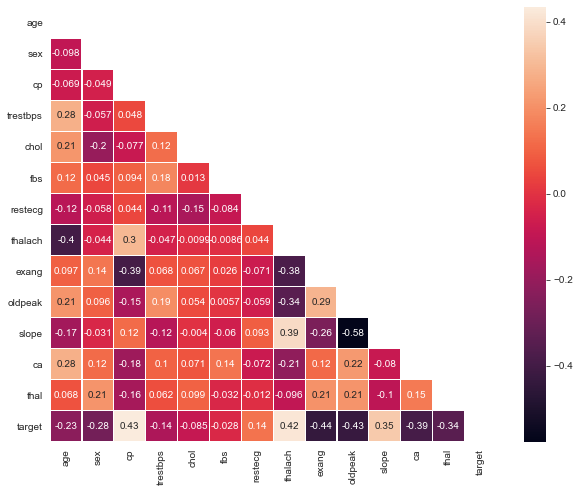

In [53]:
# Pearson Correlation Heatmap
plt.figure(figsize=(10,8))

# correlation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# heatmap
sns.heatmap(corr, linewidths=0.1, annot=True, mask=mask)

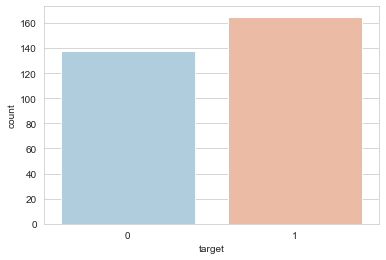

In [54]:
# The counts of observations in each categorical bin of target variable, using bars.
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

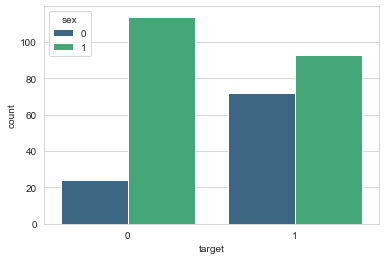

In [55]:
# Count plot of target variable with respect to gender.
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=df,palette='viridis')

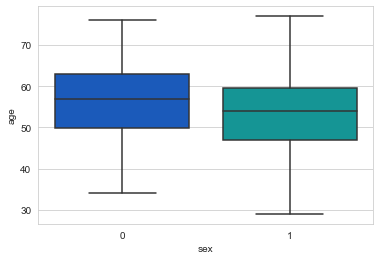

In [56]:
# Box plot (Age Vs Gender)
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex',y='age',data=df,palette='winter')

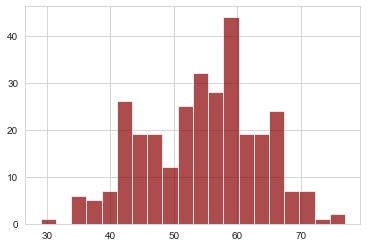

In [57]:
# Histogram (Age)
df['age'].hist(bins=20,color='darkred',alpha=0.7)

In [58]:
# Based on the correlation strength removing least correlated features ('fbs' and 'chol'). And separating independent and target variable.
X=df.drop(['target', 'fbs', 'chol'], axis=1)
y=df['target']

Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Bagging Classifier

In [60]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(n_estimators=100, random_state=42)
bagg.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

### Model Performance Evaluation

In [61]:
# prediction on unseen data
y_pred_bagg=bagg.predict(X_test)

[[34  7]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



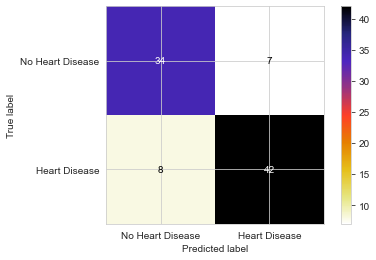

In [62]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix 

print(confusion_matrix(y_test, y_pred_bagg))
plot_confusion_matrix(bagg, X_test, y_test, cmap='CMRmap_r', display_labels=['No Heart Disease', 'Heart Disease'])
print(classification_report(y_test, y_pred_bagg))

In [63]:
# saving the weights of trained model.
import pickle
pickle_out=open("heartdisease.pkl", "wb")
pickle.dump(bagg, pickle_out)
pickle_out.close()